Import Libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

Load Dataset

In [108]:
customers_df = pd.read_csv('Mall_Customers.csv')

Explore Dataset

In [109]:
customers_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [110]:
customers_df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [111]:
# Check null values
customers_df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [112]:
# Check duplicates
print(f'Duplicates in dataset = {customers_df.duplicated().sum()}')

Duplicates in dataset = 0


In [113]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [114]:
customers_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Exploratory Data Analysis (EDA)

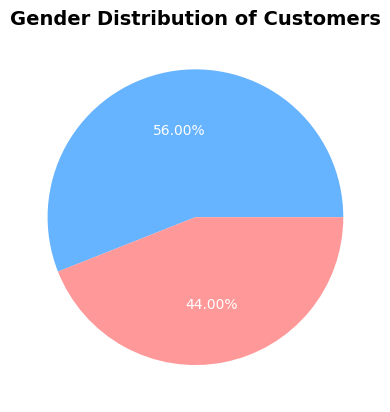

In [115]:
gender_counts = customers_df['Genre'].value_counts()


plt.pie(x=gender_counts.values , labels= gender_counts.index , autopct='%.2f%%', textprops={'color' : 'white'} , colors=['#66b3ff', '#ff9999'])
plt.title("Gender Distribution of Customers", fontsize=14, fontweight='bold')
plt.show()

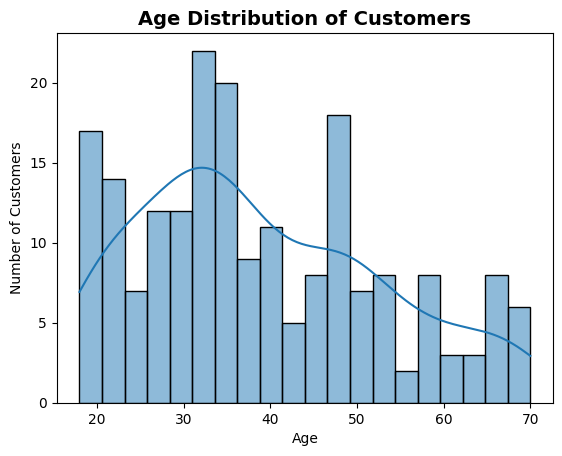

In [116]:
sns.histplot(data=customers_df , x='Age',kde=True , bins=20)
plt.title("Age Distribution of Customers", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

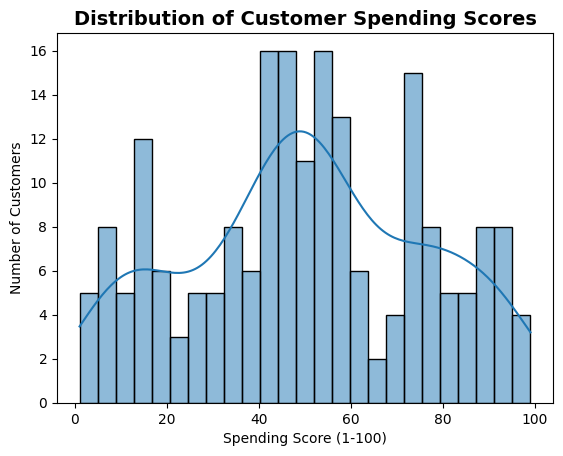

In [117]:
sns.histplot(data= customers_df , x='Spending Score (1-100)',kde=True , bins=25)
plt.title("Distribution of Customer Spending Scores", fontsize=14, fontweight='bold')
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Number of Customers")
plt.show()

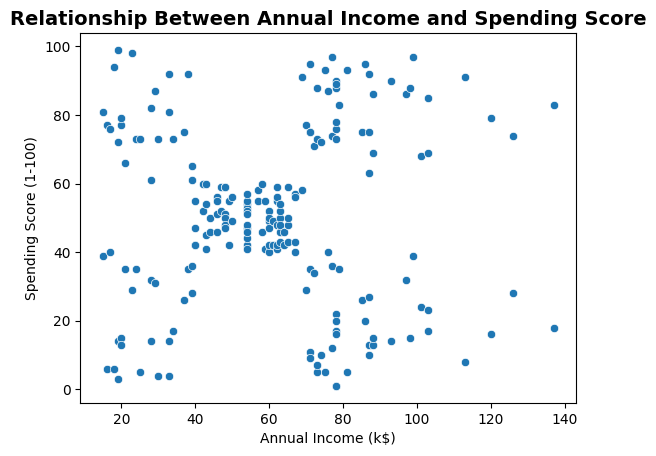

In [118]:
sns.scatterplot(data=customers_df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Relationship Between Annual Income and Spending Score", fontsize=14, fontweight='bold')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


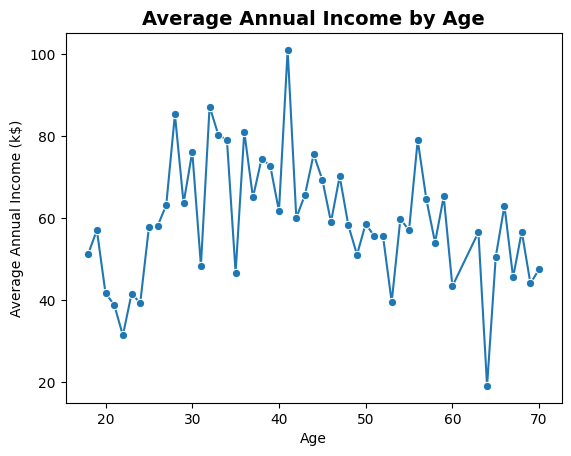

In [119]:
age_income = customers_df.groupby('Age')['Annual Income (k$)'].mean().reset_index()

sns.lineplot(data=age_income, x='Age', y='Annual Income (k$)', marker='o')
plt.title("Average Annual Income by Age", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Average Annual Income (k$)")
plt.show()

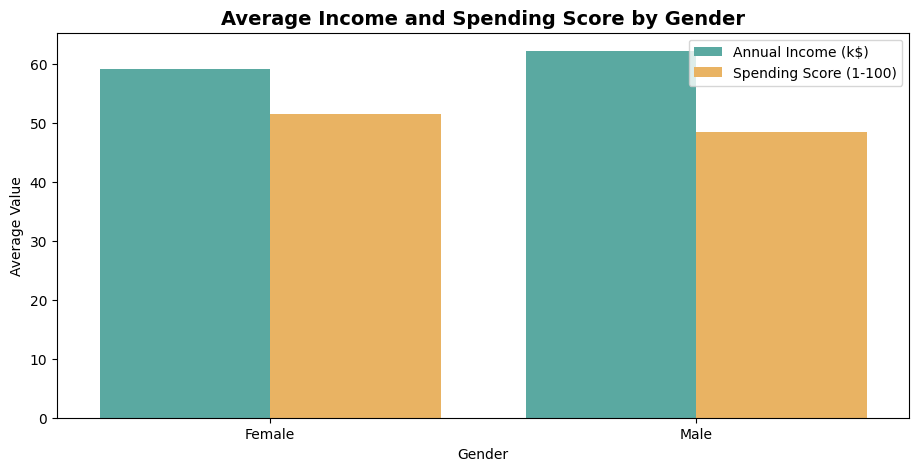

In [120]:
genre_summary  = customers_df.groupby('Genre')[['Annual Income (k$)','Spending Score (1-100)']].mean().reset_index()
genre_summary_melted = genre_summary.melt(id_vars='Genre',var_name='Metric',value_name='Average Value')
colors = ['#4DB6AC', '#FFB74D']


plt.figure(figsize=(11,5))
sns.barplot(data=genre_summary_melted , x='Genre' , y='Average Value', hue='Metric', palette= colors)
plt.title("Average Income and Spending Score by Gender", fontsize=14, fontweight='bold')
plt.ylabel("Average Value")
plt.xlabel("Gender")
plt.legend(title='')
plt.show()

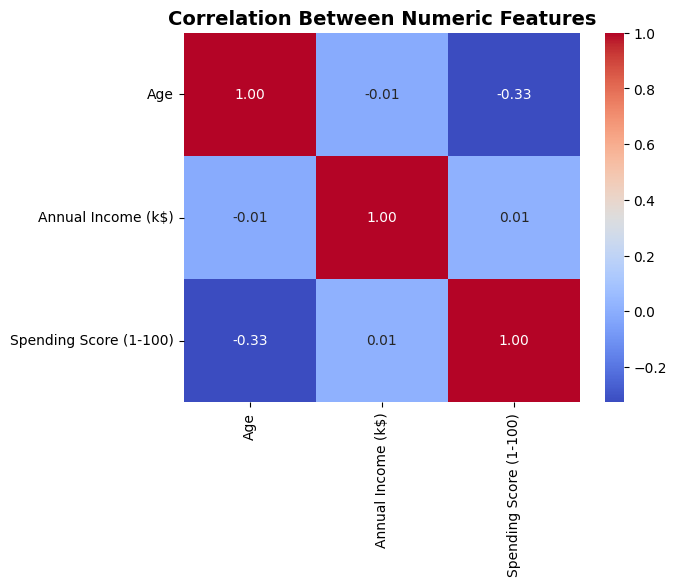

In [121]:
num_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
customers_df_corr = customers_df[num_cols].corr()

sns.heatmap(data=customers_df_corr , annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numeric Features", fontsize=14, fontweight='bold')
plt.show()

Encode Genre column

In [122]:
encode = LabelEncoder()

In [123]:
customers_df['Genre_encoded'] = encode.fit_transform(customers_df['Genre'])

In [124]:
customers_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


Create KMeans model

In [147]:
k_range = range(1,10)
sse = []
X = customers_df.iloc[:,3:5]

for k in k_range:
    km_model = KMeans(n_clusters=k)
    km_model.fit(X)
    sse.append(km_model.inertia_)


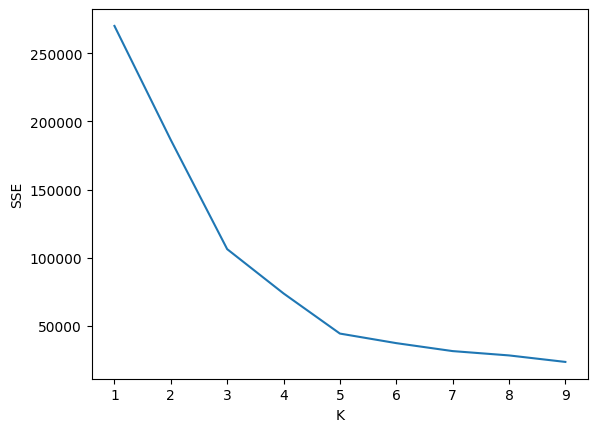

In [159]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)
plt.show()

In [189]:
kmeans_model = KMeans(n_clusters=5,random_state=11)

In [190]:
y_pred = kmeans_model.fit_predict(X)
y_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [191]:
customers_df['cluster'] = y_pred
customers_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_encoded,cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,0,3
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,3


In [192]:
cluster0 = customers_df[customers_df['cluster'] == 0]  
cluster1 = customers_df[customers_df['cluster'] == 1]  
cluster2 = customers_df[customers_df['cluster'] == 2]  
cluster3 = customers_df[customers_df['cluster'] == 3]  
cluster4 = customers_df[customers_df['cluster'] == 4]  

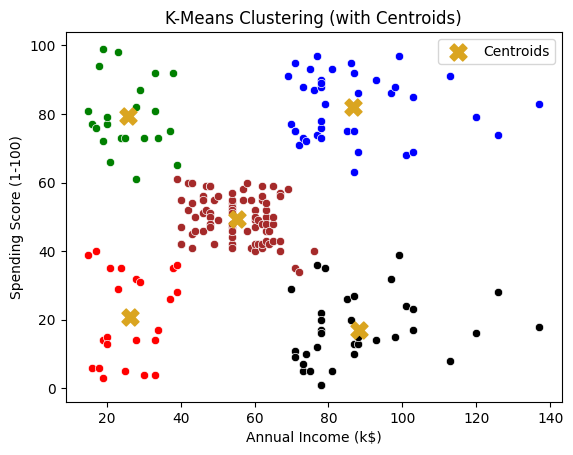

In [203]:
# Visualize clusters

centers = kmeans_model.cluster_centers_

sns.scatterplot(data=cluster0 , x='Annual Income (k$)' , y= 'Spending Score (1-100)' ,color = 'red')
sns.scatterplot(data=cluster1 , x='Annual Income (k$)' , y= 'Spending Score (1-100)' ,color = 'blue')
sns.scatterplot(data=cluster2 , x='Annual Income (k$)' , y= 'Spending Score (1-100)' ,color = 'brown')
sns.scatterplot(data=cluster3 , x='Annual Income (k$)' , y= 'Spending Score (1-100)' ,color = 'black')
sns.scatterplot(data=cluster4 , x='Annual Income (k$)' , y= 'Spending Score (1-100)' ,color = 'green')

# Add centroids
plt.scatter(centers[:, 0], centers[:, 1], c='goldenrod', s=150, marker='X', label='Centroids')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (with Centroids)')
plt.legend()
plt.show()

In [204]:
score = silhouette_score(X, kmeans_model.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.553931997444648
